In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv('kagg_train_titanic.csv')
test = pd.read_csv('kagg_test_titanic.csv')

In [3]:
train

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived,Age,SibSp,Parch,Fare
0,0,1,1,0,1,0,22.0,1,0,7.2500
1,0,0,0,0,0,1,38.0,1,0,71.2833
2,0,1,0,0,1,1,26.0,0,0,7.9250
3,0,0,0,0,1,1,35.0,1,0,53.1000
4,0,1,1,0,1,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
884,1,0,1,0,1,0,27.0,0,0,13.0000
885,0,0,0,0,1,1,19.0,0,0,30.0000
886,0,1,0,0,1,0,28.0,1,2,23.4500
887,0,0,1,0,0,1,26.0,0,0,30.0000


In [4]:
test

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,1,1,1,0,34.5,0,0,7.8292
1,0,1,0,0,1,47.0,1,0,7.0000
2,1,0,1,1,0,62.0,0,0,9.6875
3,0,1,1,0,1,27.0,0,0,8.6625
4,0,1,0,0,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...,...
413,0,1,1,0,1,27.0,0,0,8.0500
414,0,0,0,0,0,39.0,0,0,108.9000
415,0,1,1,0,1,38.5,0,0,7.2500
416,0,1,1,0,1,27.0,0,0,8.0500


In [5]:
X = train.drop('Survived', axis =1)

In [6]:
y = train['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state= 101)

In [8]:
scaler = StandardScaler()

In [9]:
knn = KNeighborsClassifier()

In [10]:
operations = [('scaler', scaler), ('knn', knn)]

In [11]:
pipe = Pipeline(operations)

In [12]:
param = {'knn__n_neighbors': list(range(1,30))}

In [13]:
grid_model = GridSearchCV(pipe, param_grid = param, cv = 5)

In [14]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]})

In [15]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=4))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=4),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 4,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [16]:
grid_pred = grid_model.predict(X_test)

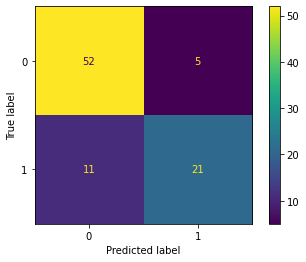

In [17]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [24]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        57
           1       0.81      0.66      0.72        32

    accuracy                           0.82        89
   macro avg       0.82      0.78      0.80        89
weighted avg       0.82      0.82      0.82        89



<Figure size 720x432 with 0 Axes>

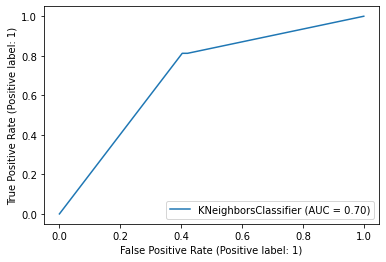

In [26]:
plt.figure(figsize = (10,6))
plot_roc_curve(knn_model, X_test, y_test)

In [19]:
knn_model =  KNeighborsClassifier(n_neighbors = 4)

In [20]:
operation = [('scaler', scaler), ('knn_model', knn_model)]

In [21]:
pipe = Pipeline(operation)

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_model', KNeighborsClassifier(n_neighbors=4))])